In [312]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import quandl as ql
import datetime as dt

In [313]:
def label(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > 0:
            y[i] = 1  # stock price rise
        else:
            y[i] = -1  # stock price drop
    return y

In [383]:
# prepare y
ql.ApiConfig.api_key = 'W43-tXma8s5zP8_MR5dR'
apple = ql.get('WIKI/AAPL', start_date="2018-01-01", end_date="2018-01-31")
y_data = np.array(apple['Adj. Close']) - np.array(apple['Adj. Open']) 
y = label(y_data)

In [441]:
# prepare x
df = pd.DataFrame(pd.read_csv('/Users/jinxiwen/Downloads/equity strength.csv'))   # for simplicity, I removed the intra day time value, left only date to use.
x_data = df.loc[df['ENTITY_NAME'] == 'Apple Inc.']

days = [2,3,4,5,8,9,10,11,12,16,17,18,19,22,23,24,25,26,29,30,31]     # I directly use trading days without matching by code
x=[]
for i in days:
    x.append(np.array(x_data.loc[x_data['TIMESTAMP_UTC'] == '2018/1/' + str(i)]['STRENGTH']))

x = np.array(x).flatten()

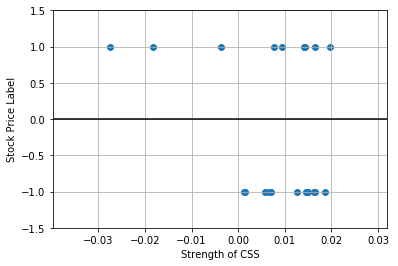

In [460]:
# grid of [x,y]
plt.scatter(x,y)
plt.axhline(0, color = 'black')
plt.ylim(-1.5, 1.5)
plt.xlabel('Strength of CSS')
plt.ylabel('Stock Price Label')
plt.grid()

In [451]:
# logistic fitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)
n_train = len(x_train)
n_test = len(x_test)
x_train = x_train.reshape(n_train,1)
x_test = x_test.reshape(n_test,1)
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

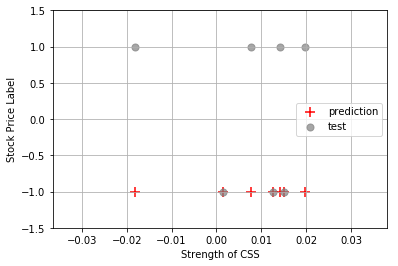

In [463]:
# plot result
plt.scatter(x_test, y_pred, marker = '+', s=100, color='red', label= 'prediction')
plt.scatter(x_test, y_test, s=50, color = 'grey', alpha = 0.7, label = 'test')
plt.legend(loc = 'best', prop={'size':10})
plt.ylim(-1.5, 1.5)
plt.xlabel('Strength of CSS')
plt.ylabel('Stock Price Label')
plt.grid()